In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

# Monte Carlo Simulation

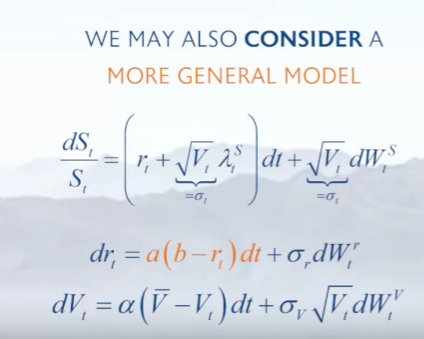

Assuming a mean-reverting model for interest rates, what happens when the current interest rate value is below the long-term mean value?

When interest rate is below its long-term mean value, it tends to go back up to the long-term mean value on average, with an intensity which is proportional to the speed of mean-reversion.

Question
Assuming a mean-reverting model for interest rates with long-term mean level equal to 2%. If the current level of interest rate is 3% and if the speed of mean reversion is 0.5, what is the average annual expected change in interest rate?

A: The expected change in interest rate is given by 0.5x(1%-2%)=-0.5%.     